In [1]:
import sys, os

ROOT_DIR = os.path.abspath(os.path.join('', 'src'))
sys.path.insert(0, os.path.join(ROOT_DIR))


In [2]:
from trainer import Trainer
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np
from utils import get_rays, sample_from_rays, volume_rendering, image_float_to_uint8
import torchvision.transforms.functional as F

In [3]:
visualize = Trainer(save_dir='srnchair_500_view3', gpu='0', jsonfile = 'srnchair.json')
dataiter = iter(visualize.dataloader)

In [4]:
def imshow(img):
    if type(img) == torch.Tensor:
        img = img.cpu().numpy()
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

In [33]:
poses1 = torch.tensor([[-7.4984e-02, -2.5183e-01,  9.6486e-01,  1.9297e+00],
        [ 9.9718e-01, -1.8936e-02,  7.2554e-02,  1.4511e-01],
        [-5.7742e-08,  9.6759e-01,  2.5254e-01,  5.0508e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])

In [34]:
poses2 = torch.tensor([[-7.9176e-01,  9.7925e-02,  6.0293e-01,  1.2059e+00],
        [ 6.1083e-01,  1.2693e-01,  7.8152e-01,  1.5630e+00],
        [ 4.4703e-08,  9.8707e-01, -1.6032e-01, -3.2063e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])

In [35]:
poses3 = torch.tensor([[ 4.2335e-01,  5.3481e-02,  9.0438e-01,  1.8088e+00],
        [ 9.0596e-01, -2.4992e-02, -4.2262e-01, -8.4523e-01],
        [ 7.4506e-08,  9.9826e-01, -5.9032e-02, -1.1806e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])

In [36]:
poses4 = torch.tensor([[-2.4096e-01,  4.3716e-01, -8.6650e-01, -1.7330e+00],
        [-9.7053e-01, -1.0854e-01,  2.1513e-01,  4.3027e-01],
        [ 1.0431e-07,  8.9281e-01,  4.5044e-01,  9.0087e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])

In [37]:
poses_list = [poses1, poses2, poses3, poses4]

tensor([4], device='cuda:0')
tensor([[-5.7901e-01,  9.7682e-02, -8.0944e-01, -1.6189e+00],
        [-8.1532e-01, -6.9371e-02,  5.7484e-01,  1.1497e+00],
        [-2.4959e-07,  9.9280e-01,  1.1981e-01,  2.3962e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])
torch.Size([3, 128, 128])
<class 'torch.Tensor'>


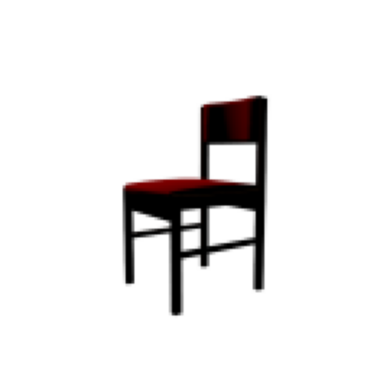

In [14]:
focal, H, W, imgs, poses, instances, obj_idx = next(dataiter)
obj_idx = obj_idx.to(visualize.device)
print(obj_idx)
print(poses[0][0])
imgs = imgs[0,-1].reshape(H,W,3).permute(2,0,1)
print(imgs.shape)
print(type(imgs))
imshow(imgs)

In [15]:
imgs_list = []

In [16]:
imgs_list.append(imgs)

tensor([5], device='cuda:0')
tensor([[ 6.8807e-01, -5.6412e-01,  4.5644e-01,  9.1287e-01],
        [ 7.2565e-01,  5.3490e-01, -4.3280e-01, -8.6560e-01],
        [ 1.1921e-07,  6.2901e-01,  7.7740e-01,  1.5548e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])


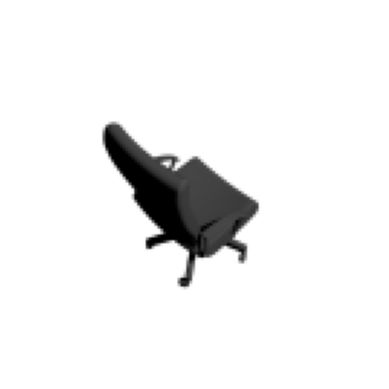

In [17]:
focal_, H_, W_, imgs_, poses_, instances_, obj_idx_ = next(dataiter)
obj_idx_ = obj_idx_.to(visualize.device)
print(obj_idx_)
print(poses_[0][0])
imgs_ = imgs_[0,-1].reshape(H_,W_,3).permute(2,0,1)
imshow(imgs_)

In [18]:
imgs_list.append(imgs_)

tensor([7], device='cuda:0')
tensor([[ 9.9878e-01, -4.3800e-02,  2.2609e-02,  4.5218e-02],
        [ 4.9291e-02,  8.8752e-01, -4.5813e-01, -9.1626e-01],
        [ 5.5879e-09,  4.5869e-01,  8.8860e-01,  1.7772e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])


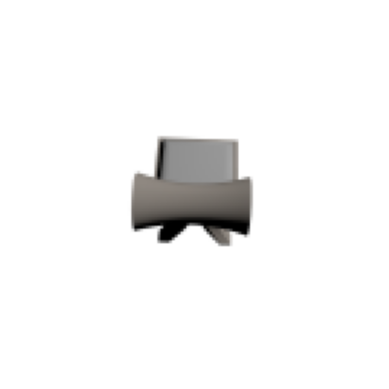

In [58]:
focal_, H_, W_, imgs_, poses_, instances_, obj_idx_ = next(dataiter)
obj_idx_ = obj_idx_.to(visualize.device)
print(obj_idx_)
print(poses_[0][0])
imgs_ = imgs_[0,-1].reshape(H_,W_,3).permute(2,0,1)
imshow(imgs_)

In [59]:
imgs_list.append(imgs_)

tensor([11], device='cuda:0')
tensor([[-9.1793e-01,  2.0493e-01, -3.3970e-01, -6.7940e-01],
        [-3.9673e-01, -4.7416e-01,  7.8599e-01,  1.5720e+00],
        [ 8.9407e-08,  8.5625e-01,  5.1656e-01,  1.0331e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])


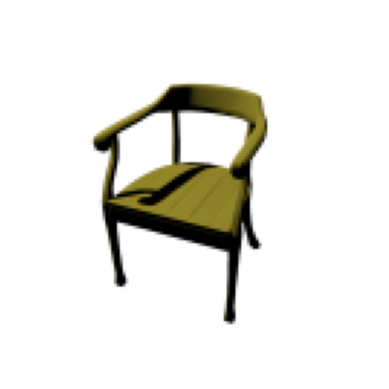

In [68]:
focal_, H_, W_, imgs_, poses_, instances_, obj_idx_ = next(dataiter)
obj_idx_ = obj_idx_.to(visualize.device)
print(obj_idx_)
print(poses_[0][0])
imgs_ = imgs_[0,-1].reshape(H_,W_,3).permute(2,0,1)
imshow(imgs_)

In [69]:
imgs_list.append(imgs_)

In [19]:
PATH = 'exps/srnchair_500_view3/models.pth'
checkpoint = torch.load(PATH)

In [20]:
visualize.model.load_state_dict(checkpoint['model_params'])
visualize.shape_codes.load_state_dict(checkpoint['shape_code_params'])
visualize.texture_codes.load_state_dict(checkpoint['texture_code_params'])

<All keys matched successfully>

In [21]:
shape_code, texture_code = visualize.shape_codes(obj_idx), visualize.texture_codes(obj_idx)
rays_o, viewdir = get_rays(H.item(), W.item(), focal, poses[0,0])
xyz, viewdir, z_vals = sample_from_rays(rays_o, viewdir, visualize.hpams['near'], visualize.hpams['far'],
                                            visualize.hpams['N_samples'])

In [22]:
m=5
z_shape_np = np.zeros((m, 128))
z_txt_np = np.zeros((m, 128))
img_est_np = []
with torch.no_grad():
    for i in range(m):
        z_shape = torch.randn(1, 128).cuda()
        z_txt = torch.randn(1, 128).cuda()
        sigmas, rgbs = visualize.model(xyz.to(visualize.device),
                                  viewdir.to(visualize.device),
                                  shape_code, 
                                  texture_code,
                                  z_shape,
                                  z_txt)
        rgb_rays, _ = volume_rendering(sigmas, rgbs, z_vals.to(visualize.device))
        z_shape_np[i] = z_shape.cpu().numpy()
        z_txt_np[i] = z_txt.cpu().numpy()
        img_est_np.append(rgb_rays.view(H,W,3).permute(2,0,1).cpu().numpy())


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


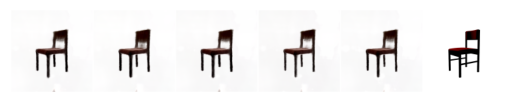

In [23]:
img_est_np.append(imgs)
imshow(torchvision.utils.make_grid(torch.tensor(img_est_np),pad_value = 1))

In [38]:
img_novel_view = []
with torch.no_grad():
    for i in range(len(poses_list)):
        rays_o, viewdir = get_rays(H.item(), W.item(), focal, poses_list[i])
        xyz, viewdir, z_vals = sample_from_rays(rays_o, viewdir, visualize.hpams['near'], visualize.hpams['far'],
                                            visualize.hpams['N_samples'])
        z_shape = torch.randn(1, 128).cuda()
        z_txt = torch.randn(1, 128).cuda()
        sigmas, rgbs = visualize.model(xyz.to(visualize.device),
                                  viewdir.to(visualize.device),
                                  shape_code, 
                                  texture_code,
                                  z_shape,
                                  z_txt)
        rgb_rays, _ = volume_rendering(sigmas, rgbs, z_vals.to(visualize.device))
        img_novel_view.append(rgb_rays.view(H,W,3).permute(2,0,1).cpu().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


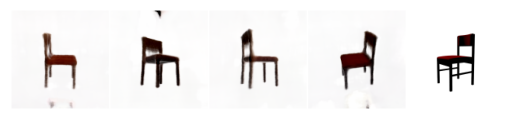

In [39]:
img_novel_view.append(imgs)
imshow(torchvision.utils.make_grid(torch.tensor(img_novel_view),pad_value = 1))

In [70]:
shape_code_, texture_code_ = visualize.shape_codes(obj_idx_), visualize.texture_codes(obj_idx_)
rays_o_, viewdir_ = get_rays(H_.item(), W_.item(), focal, poses[0,0])
xyz_, viewdir_, z_vals_ = sample_from_rays(rays_o_, viewdir_, visualize.hpams['near'], visualize.hpams['far'],
                                            visualize.hpams['N_samples'])

In [41]:
n = 4
shape_interpolation_list = []
for i in range(n+1):
    shape_interpolation_list.append(shape_code + i*(shape_code_-shape_code)/n)

In [42]:
n = 4
texture_interpolation_list = []
for i in range(n+1):
    texture_interpolation_list.append(texture_code + i*(texture_code_-texture_code)/n)

In [43]:
img_texture_interpolation_list = []
img_texture_interpolation_list.append(imgs.numpy())
with torch.no_grad():
    for i in range(len(texture_interpolation_list)):
        z_shape = torch.randn(1, 128).cuda()
        z_txt = torch.randn(1, 128).cuda()
        sigmas, rgbs = visualize.model(xyz.to(visualize.device),
                                  viewdir.to(visualize.device),
                                  shape_code, 
                                  texture_interpolation_list[i],
                                  z_shape,
                                  z_txt)
        rgb_rays, _ = volume_rendering(sigmas, rgbs, z_vals.to(visualize.device))
        img_texture_interpolation_list.append(rgb_rays.view(H,W,3).permute(2,0,1).cpu().numpy())


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


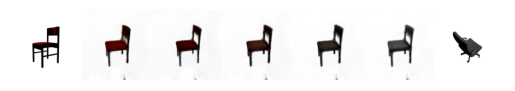

In [44]:
img_texture_interpolation_list.append(imgs_)
imshow(torchvision.utils.make_grid(torch.tensor(img_texture_interpolation_list),pad_value = 1))

In [45]:
img_shape_interpolation_list = []
img_shape_interpolation_list.append(imgs.numpy())
with torch.no_grad():
    for i in range(len(shape_interpolation_list)):
        z_shape = torch.randn(1, 128).cuda()
        z_txt = torch.randn(1, 128).cuda()
        sigmas, rgbs = visualize.model(xyz.to(visualize.device),
                                  viewdir.to(visualize.device),
                                  shape_interpolation_list[i], 
                                  texture_code,
                                  z_shape,
                                  z_txt)
        rgb_rays, _ = volume_rendering(sigmas, rgbs, z_vals.to(visualize.device))
        img_shape_interpolation_list.append(rgb_rays.view(H,W,3).permute(2,0,1).cpu().numpy())


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


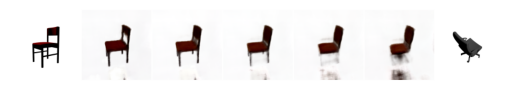

In [46]:
img_shape_interpolation_list.append(imgs_)
imshow(torchvision.utils.make_grid(torch.tensor(img_shape_interpolation_list),pad_value = 1))

In [47]:
n = 5
z_shape_np_ = np.zeros((n, 128))
z_txt_np_ = np.zeros((n, 128))
img_est_np_ = []
with torch.no_grad():
    for i in range(n):
        z_shape_ = torch.randn(1, 128).cuda()
        z_txt_ = torch.randn(1, 128).cuda()
        sigmas_, rgbs_ = visualize.model(xyz_.to(visualize.device),
                                  viewdir_.to(visualize.device),
                                  shape_code_, 
                                  texture_code_,
                                  z_shape_,
                                  z_txt_)
        rgb_rays_, _ = volume_rendering(sigmas_, rgbs_, z_vals_.to(visualize.device))
        z_shape_np_[i] = z_shape_.cpu().numpy()
        z_txt_np_[i] = z_txt_.cpu().numpy()
        img_est_np_.append(rgb_rays_.view(H_,W_,3).permute(2,0,1).cpu().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


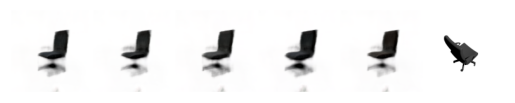

In [48]:
img_est_np_.append(imgs_)
imshow(torchvision.utils.make_grid(torch.tensor(img_est_np_),pad_value = 1))

In [49]:
img_novel_view_ = []
with torch.no_grad():
    for i in range(len(poses_list)):
        rays_o, viewdir = get_rays(H.item(), W.item(), focal, poses_list[i])
        xyz, viewdir, z_vals = sample_from_rays(rays_o, viewdir, visualize.hpams['near'], visualize.hpams['far'],
                                            visualize.hpams['N_samples'])
        z_shape = torch.randn(1, 128).cuda()
        z_txt = torch.randn(1, 128).cuda()
        sigmas, rgbs = visualize.model(xyz.to(visualize.device),
                                  viewdir.to(visualize.device),
                                  shape_code_, 
                                  texture_code_,
                                  z_shape,
                                  z_txt)
        rgb_rays, _ = volume_rendering(sigmas, rgbs, z_vals.to(visualize.device))
        img_novel_view_.append(rgb_rays.view(H,W,3).permute(2,0,1).cpu().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


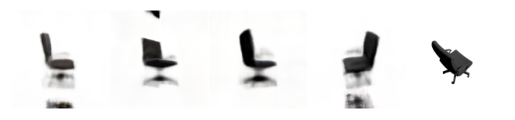

In [50]:
img_novel_view_.append(imgs_)
imshow(torchvision.utils.make_grid(torch.tensor(img_novel_view_),pad_value = 1))

In [51]:
shape_code_list = []
texture_code_list = []

In [52]:
shape_code_list.append(visualize.shape_codes(obj_idx))
texture_code_list.append(visualize.texture_codes(obj_idx))

In [71]:
shape_code_list.append(visualize.shape_codes(obj_idx_))
texture_code_list.append(visualize.texture_codes(obj_idx_))

In [72]:
len(shape_code_list)

4

In [73]:
len(texture_code_list)

4

In [74]:
len(imgs_list)

4

In [75]:
img_est_np_list = []
with torch.no_grad():
    for i in range(len(shape_code_list)):
        for j in range(len(texture_code_list)):
            print(i,j)
            z_shape = torch.randn(1, 128).cuda()
            z_txt = torch.randn(1, 128).cuda()
            sigmas, rgbs = visualize.model(xyz.to(visualize.device),
                                        viewdir.to(visualize.device),
                                        shape_code_list[i], 
                                        texture_code_list[j],
                                        z_shape,
                                        z_txt)
            rgb_rays, _ = volume_rendering(sigmas, rgbs, z_vals.to(visualize.device))
            img_est_np_list.append(rgb_rays.view(H,W,3).permute(2,0,1).cpu().numpy())
        img_est_np_list.append(imgs_list[i])

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


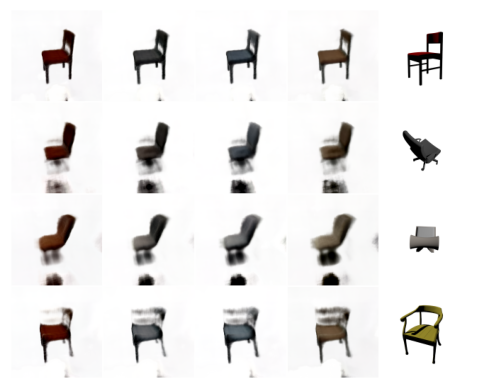

In [76]:
imshow(torchvision.utils.make_grid(torch.tensor(img_est_np_list),pad_value = 1, nrow = len(shape_code_list) + 1))